In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import MDS

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
df=pd.read_csv('9000a 09520.csv')

In [5]:
df.head()

Machine_Name Additional_Info_1                 Additional_Info_2  \
0           NaN       9000a 09520                                     
1           NaN       9000a 09520                                     
2           NaN       9000a 09520                                     
3           NaN       9000a 09520                                     
4           NaN       9000a 09520                                     

                   TimeStamp  Shot_Number  NGmark  Injection_Time  \
0  2022-05-30 10:10:47+09:00       3315.0       1            7.66   
1  2022-05-30 10:10:47+09:00       3316.0       1            7.66   
2  2022-05-30 10:10:47+09:00       3317.0       1            7.66   
3  2022-05-30 10:10:47+09:00       3318.0       1            7.66   
4  2022-05-30 10:10:47+09:00       3319.0       1            7.66   

   Filling_Time  Plasticizing_Time  Cycle_Time  Clamp_Close_Time  \
0          3.66          25.150000   66.099998              4.57   
1          3.66          25.129999   66.099998              4.57   
2          3.66          25.180000   66.099998              4.57   
3          3.66          25.160000   66.099998              4.58   
4          3.66          25.160000   66.099998              4.56   

   Cushion_Position  Switch_Over_Position  Plasticizing_Position  \
0              21.6                  23.0             158.199997   
1              21.6                  23.0             158.100006   
2              21.5                  22.9             158.199997   
3              21.6                  23.0             158.199997   
4              21.6                  23.0             158.199997   

   Clamp_Open_Position  Max_Injection_Speed  Max_Screw_RPM  Average_Screw_RPM  \
0          1028.199951            47.400002           69.0               59.0   
1          1028.300049            47.400002           62.0               59.0   
2          1028.400024            47.400002           61.0               59.0   
3          1028.500000            47.400002           69.0               59.0   
4          1028.300049            47.400002           62.0               59.0   

   Max_Injection_Pressure  Max_Switch_Over_Pressure  Max_Back_Pressure  \
0               92.800003                 88.300003          24.200001   
1               93.199997                 88.400002          24.299999   
2               92.800003                 88.400002          24.200001   
3               92.699997                 88.800003          24.200001   
4               92.699997                 88.000000          24.299999   

   Average_Back_Pressure  Barrel_Temperature_1  Barrel_Temperature_2  \
0                   22.9            191.699997            209.800003   
1                   22.9            191.500000            209.000000   
2                   22.9            191.399994            208.899994   
3                   22.9            191.199997            209.199997   
4                   22.9            191.399994            210.199997   

   Barrel_Temperature_3  Barrel_Temperature_4  Barrel_Temperature_5  \
0            235.199997            225.000000            208.000000   
1            235.199997            225.100006            207.899994   
2            235.300003            225.100006            208.000000   
3            235.100006            224.899994            208.000000   
4            235.000000            225.000000            207.899994   

   Barrel_Temperature_6  Barrel_Temperature_7  Hopper_Temperature  \
0            189.899994             39.599998                 0.0   
1            190.000000             39.799999                 0.0   
2            190.000000             40.000000                 0.0   
3            189.899994             40.099998                 0.0   
4            189.899994             40.200001                 0.0   

   Mold_Temperature_1  Mold_Temperature_2  Mold_Temperature_3  \
0                 0.0                 0.0                 0.0   
1     

In [6]:
weight = df[df['Weight'] > 0].reset_index(drop=True)

In [7]:
weight.describe()

Machine_Name    Shot_Number   NGmark  Injection_Time  Filling_Time  \
count           0.0   53353.000000  53353.0    53353.000000  53353.000000   
mean            NaN   44539.070249      1.0        9.003653      4.259262   
std             NaN   24439.541918      0.0        1.165146      1.231021   
min             NaN    3315.000000      1.0        6.460000      1.540000   
25%             NaN   26792.000000      1.0        8.400000      3.310000   
50%             NaN   40797.000000      1.0        9.680000      4.180000   
75%             NaN   55641.000000      1.0        9.770000      4.270000   
max             NaN  121979.000000      1.0       17.990000     14.990000   

       Plasticizing_Time     Cycle_Time  Clamp_Close_Time  Cushion_Position  \
count       53353.000000   53353.000000      53353.000000      53353.000000   
mean           35.185938      94.043680          7.039465         21.243280   
std           929.726158    1610.144875        464.858326          4.700228   
min             9.780000      45.200001          2.310000          6.200000   
25%            26.620001      69.500000          5.050000         22.000000   
50%            28.230000      70.599998          5.070000         23.799999   
75%            30.219999      71.699997          5.090000         24.299999   
max        107405.789062  107446.601562     107379.242188         24.900000   

       Switch_Over_Position  Plasticizing_Position  Clamp_Open_Position  \
count          53353.000000           53353.000000         53353.000000   
mean              22.109808             154.948912          1014.236579   
std                5.038619              16.561295            48.284894   
min                7.500000              84.400002           805.099976   
25%               23.400000             158.000000          1022.700012   
50%               25.000000             159.600006          1024.800049   
75%               25.000000             161.399994          1027.500000   
max               26.000000             166.399994          1032.199951   

       Max_Injection_Speed  Max_Screw_RPM  Average_Screw_RPM  \
count         53353.000000   53353.000000       53353.000000   
mean             49.339807      58.162353          53.547748   
std               7.535024       9.894455           8.530939   
min              40.799999      48.000000          45.000000   
25%              42.000000      52.000000          49.000000   
50%              47.099998      55.000000          49.000000   
75%              53.700001      61.000000          56.000000   
max              71.099998     189.000000          86.000000   

       Max_Injection_Pressure  Max_Switch_Over_Pressure  Max_Back_Pressure  \
count            53353.000000              53353.000000       53353.000000   
mean                96.718516                 89.999625          25.137661   
std                  5.847844                  5.660197           1.892912   
min                 63.500000                 49.400002          19.600000   
25%                 92.400002                 84.699997          23.400000   
50%                 97.800003                 90.400002          25.000000   
75%                101.800003                 94.400002          27.100000   
max                117.199997                104.900002          30.000000   

       Average_Back_Pressure  Barrel_Temperature_1  Barrel_Temperature_2  \
count           53353.000000          53353.000000          53353.000000   
mean               23.523543            195.445544            205.548376   
std                 1.950776              3.164438              4.994321   
min                18.400000            187.800003            198.600006   
25%                22.000000            193.000000            200.100006   
50%                23.000000            197.800003            209.199997   
75%                25.600000            198.000000            210.100006   
max                28.100000         

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

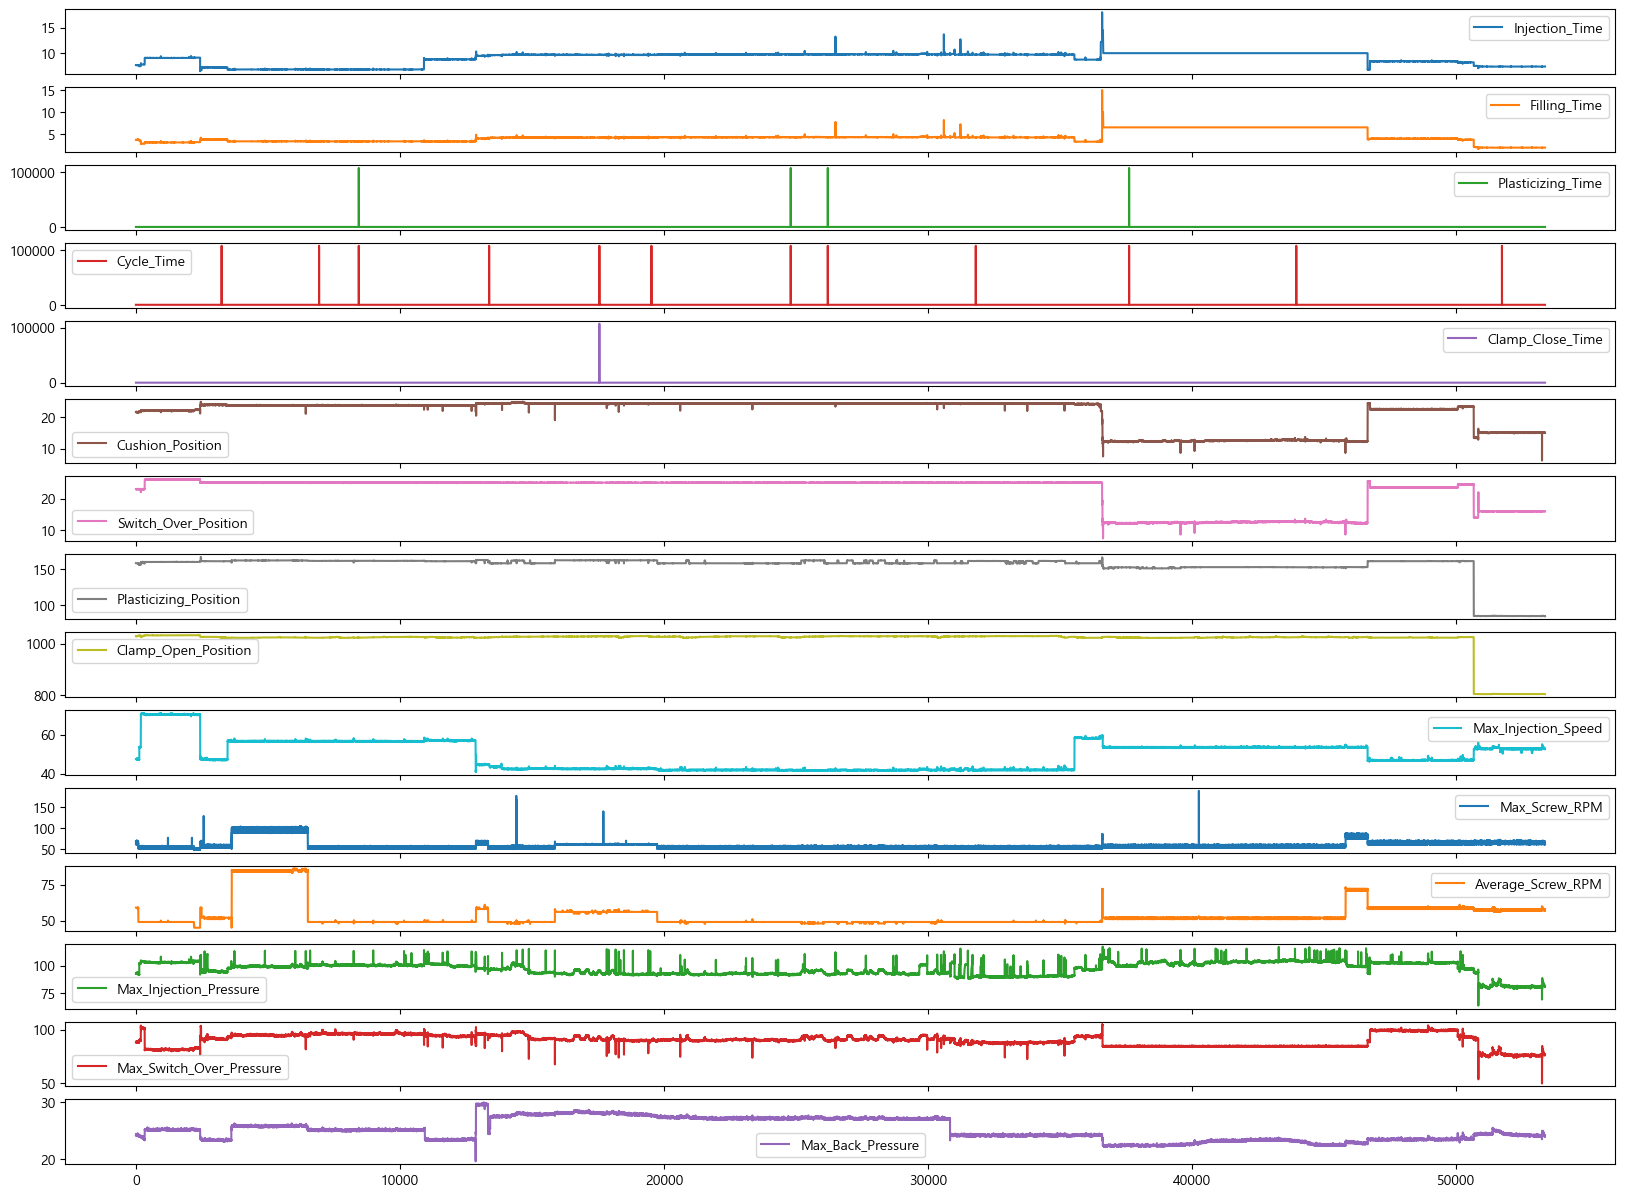

In [8]:
val_cols = ['Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time','Clamp_Close_Time','Cushion_Position','Switch_Over_Position',
            'Plasticizing_Position','Clamp_Open_Position','Max_Injection_Speed','Max_Screw_RPM','Average_Screw_RPM','Max_Injection_Pressure','Max_Switch_Over_Pressure','Max_Back_Pressure']

weight[val_cols].plot(subplots=True,figsize=(20, 15))

<AxesSubplot:ylabel='Weight'>

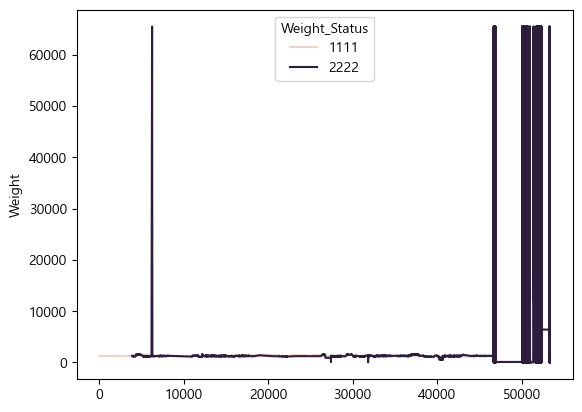

In [9]:
sns.lineplot(data=weight, x=weight.index, y='Weight', hue='Weight_Status')

<AxesSubplot:>

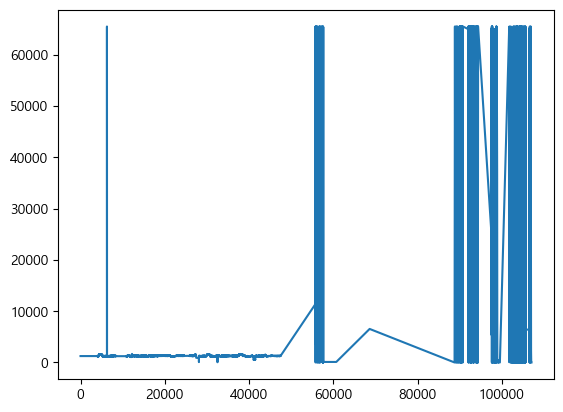

In [10]:
df[df['Weight'] > 0]['Weight'].plot()


## Multivariate Anomaly Detection

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
process_df = weight[val_cols]

process_df

Injection_Time  Filling_Time  Plasticizing_Time  Cycle_Time  \
0                7.66          3.66          25.150000   66.099998   
1                7.66          3.66          25.129999   66.099998   
2                7.66          3.66          25.180000   66.099998   
3                7.66          3.66          25.160000   66.099998   
4                7.66          3.66          25.160000   66.099998   
...               ...           ...                ...         ...   
53348            7.36          1.86          11.590000   54.099998   
53349            7.36          1.86          11.570000   54.099998   
53350            7.38          1.88          11.570000   54.099998   
53351            7.36          1.86          11.570000   54.099998   
53352            7.38          1.88          11.580000   54.099998   

       Clamp_Close_Time  Cushion_Position  Switch_Over_Position  \
0                  4.57              21.6                  23.0   
1                  4.57              21.6                  23.0   
2                  4.57              21.5                  22.9   
3                  4.58              21.6                  23.0   
4                  4.56              21.6                  23.0   
...                 ...               ...                   ...   
53348              4.44              15.0                  16.0   
53349              4.44              15.0                  16.0   
53350              4.44              15.1                  16.0   
53351              4.44              15.1                  16.0   
53352              4.44              15.0                  16.0   

       Plasticizing_Position  Clamp_Open_Position  Max_Injection_Speed  \
0                 158.199997          1028.199951            47.400002   
1                 158.100006          1028.300049            47.400002   
2                 158.199997          1028.400024            47.400002   
3                 158.199997          1028.500000            47.400002   
4                 158.199997          1028.300049            47.400002   
...                      ...                  ...                  ...   
53348              84.699997           805.200012            52.799999   
53349              84.800003           805.200012            52.500000   
53350              84.699997           805.200012            52.799999   
53351              84.699997           805.200012            52.799999   
53352              84.599998           805.200012            52.799999   

       Max_Screw_RPM  Average_Screw_RPM  Max_Injection_Pressure  \
0               69.0               59.0               92.800003   
1               62.0               59.0               93.199997   
2               61.0               59.0               92.800003   
3               69.0               59.0               92.699997   
4               62.0               59.0               92.699997   
...              ...                ...                     ...   
53348           61.0               57.0               80.400002   
53349           61.0               57.0               81.099998   
53350           61.0               57.0               80.900002   
53351           62.0               57.0               80.800003   
53352           62.0               57.0               81.099998   

       Max_Switch_Over_Pressure  Max_Back_Pressure  
0                     88.300003          24.200001  
1                     88.400002          24.299999  
2                     88.400002          24.200001  
3                     88.800003          24.200001  
4                     88.000000          24.299999  
...                         ...                ...  
53348                 76.000000          23.900000  
53349                 76.300003          24.100000  
53350                 76.199997          24.000000  
53351                 76.000000          24.000000  
53352                 76.500000          24.200001  

[53353 rows x 15 columns]

In [13]:
process_df.describe()

Injection_Time  Filling_Time  Plasticizing_Time     Cycle_Time  \
count    53353.000000  53353.000000       53353.000000   53353.000000   
mean         9.003653      4.259262          35.185938      94.043680   
std          1.165146      1.231021         929.726158    1610.144875   
min          6.460000      1.540000           9.780000      45.200001   
25%          8.400000      3.310000          26.620001      69.500000   
50%          9.680000      4.180000          28.230000      70.599998   
75%          9.770000      4.270000          30.219999      71.699997   
max         17.990000     14.990000      107405.789062  107446.601562   

       Clamp_Close_Time  Cushion_Position  Switch_Over_Position  \
count      53353.000000      53353.000000          53353.000000   
mean           7.039465         21.243280             22.109808   
std          464.858326          4.700228              5.038619   
min            2.310000          6.200000              7.500000   
25%            5.050000         22.000000             23.400000   
50%            5.070000         23.799999             25.000000   
75%            5.090000         24.299999             25.000000   
max       107379.242188         24.900000             26.000000   

       Plasticizing_Position  Clamp_Open_Position  Max_Injection_Speed  \
count           53353.000000         53353.000000         53353.000000   
mean              154.948912          1014.236579            49.339807   
std                16.561295            48.284894             7.535024   
min                84.400002           805.099976            40.799999   
25%               158.000000          1022.700012            42.000000   
50%               159.600006          1024.800049            47.099998   
75%               161.399994          1027.500000            53.700001   
max               166.399994          1032.199951            71.099998   

       Max_Screw_RPM  Average_Screw_RPM  Max_Injection_Pressure  \
count   53353.000000       53353.000000            53353.000000   
mean       58.162353          53.547748               96.718516   
std         9.894455           8.530939                5.847844   
min        48.000000          45.000000               63.500000   
25%        52.000000          49.000000               92.400002   
50%        55.000000          49.000000               97.800003   
75%        61.000000          56.000000              101.800003   
max       189.000000          86.000000              117.199997   

       Max_Switch_Over_Pressure  Max_Back_Pressure  
count              53353.000000       53353.000000  
mean                  89.999625          25.137661  
std                    5.660197           1.892912  
min                   49.400002          19.600000  
25%                   84.699997          23.400000  
50%                   90.400002          25.000000  
75%                   94.400002          27.100000  
max                  104.900002          30.000000

In [14]:
scaler = StandardScaler()

scaled = scaler.fit_transform(process_df)
scaled_df = pd.DataFrame(scaled, columns=process_df.columns)

In [15]:
# 모델 생성 및 학습
n_components = 6  # 가우시안 분포 수, 조정 가능
gmm = GaussianMixture(n_components=n_components)
gmm.fit(scaled_df)


GaussianMixture(n_components=6)

In [16]:
log_likelihood = -gmm.score_samples(scaled_df)
threshold = np.percentile(log_likelihood, 10)  # 가능도 하위 5% 지점 선택

# 이상 데이터 판단
anomalies = scaled_df[log_likelihood < threshold]

In [17]:
normal_index = scaled_df.index.difference(anomalies.index)

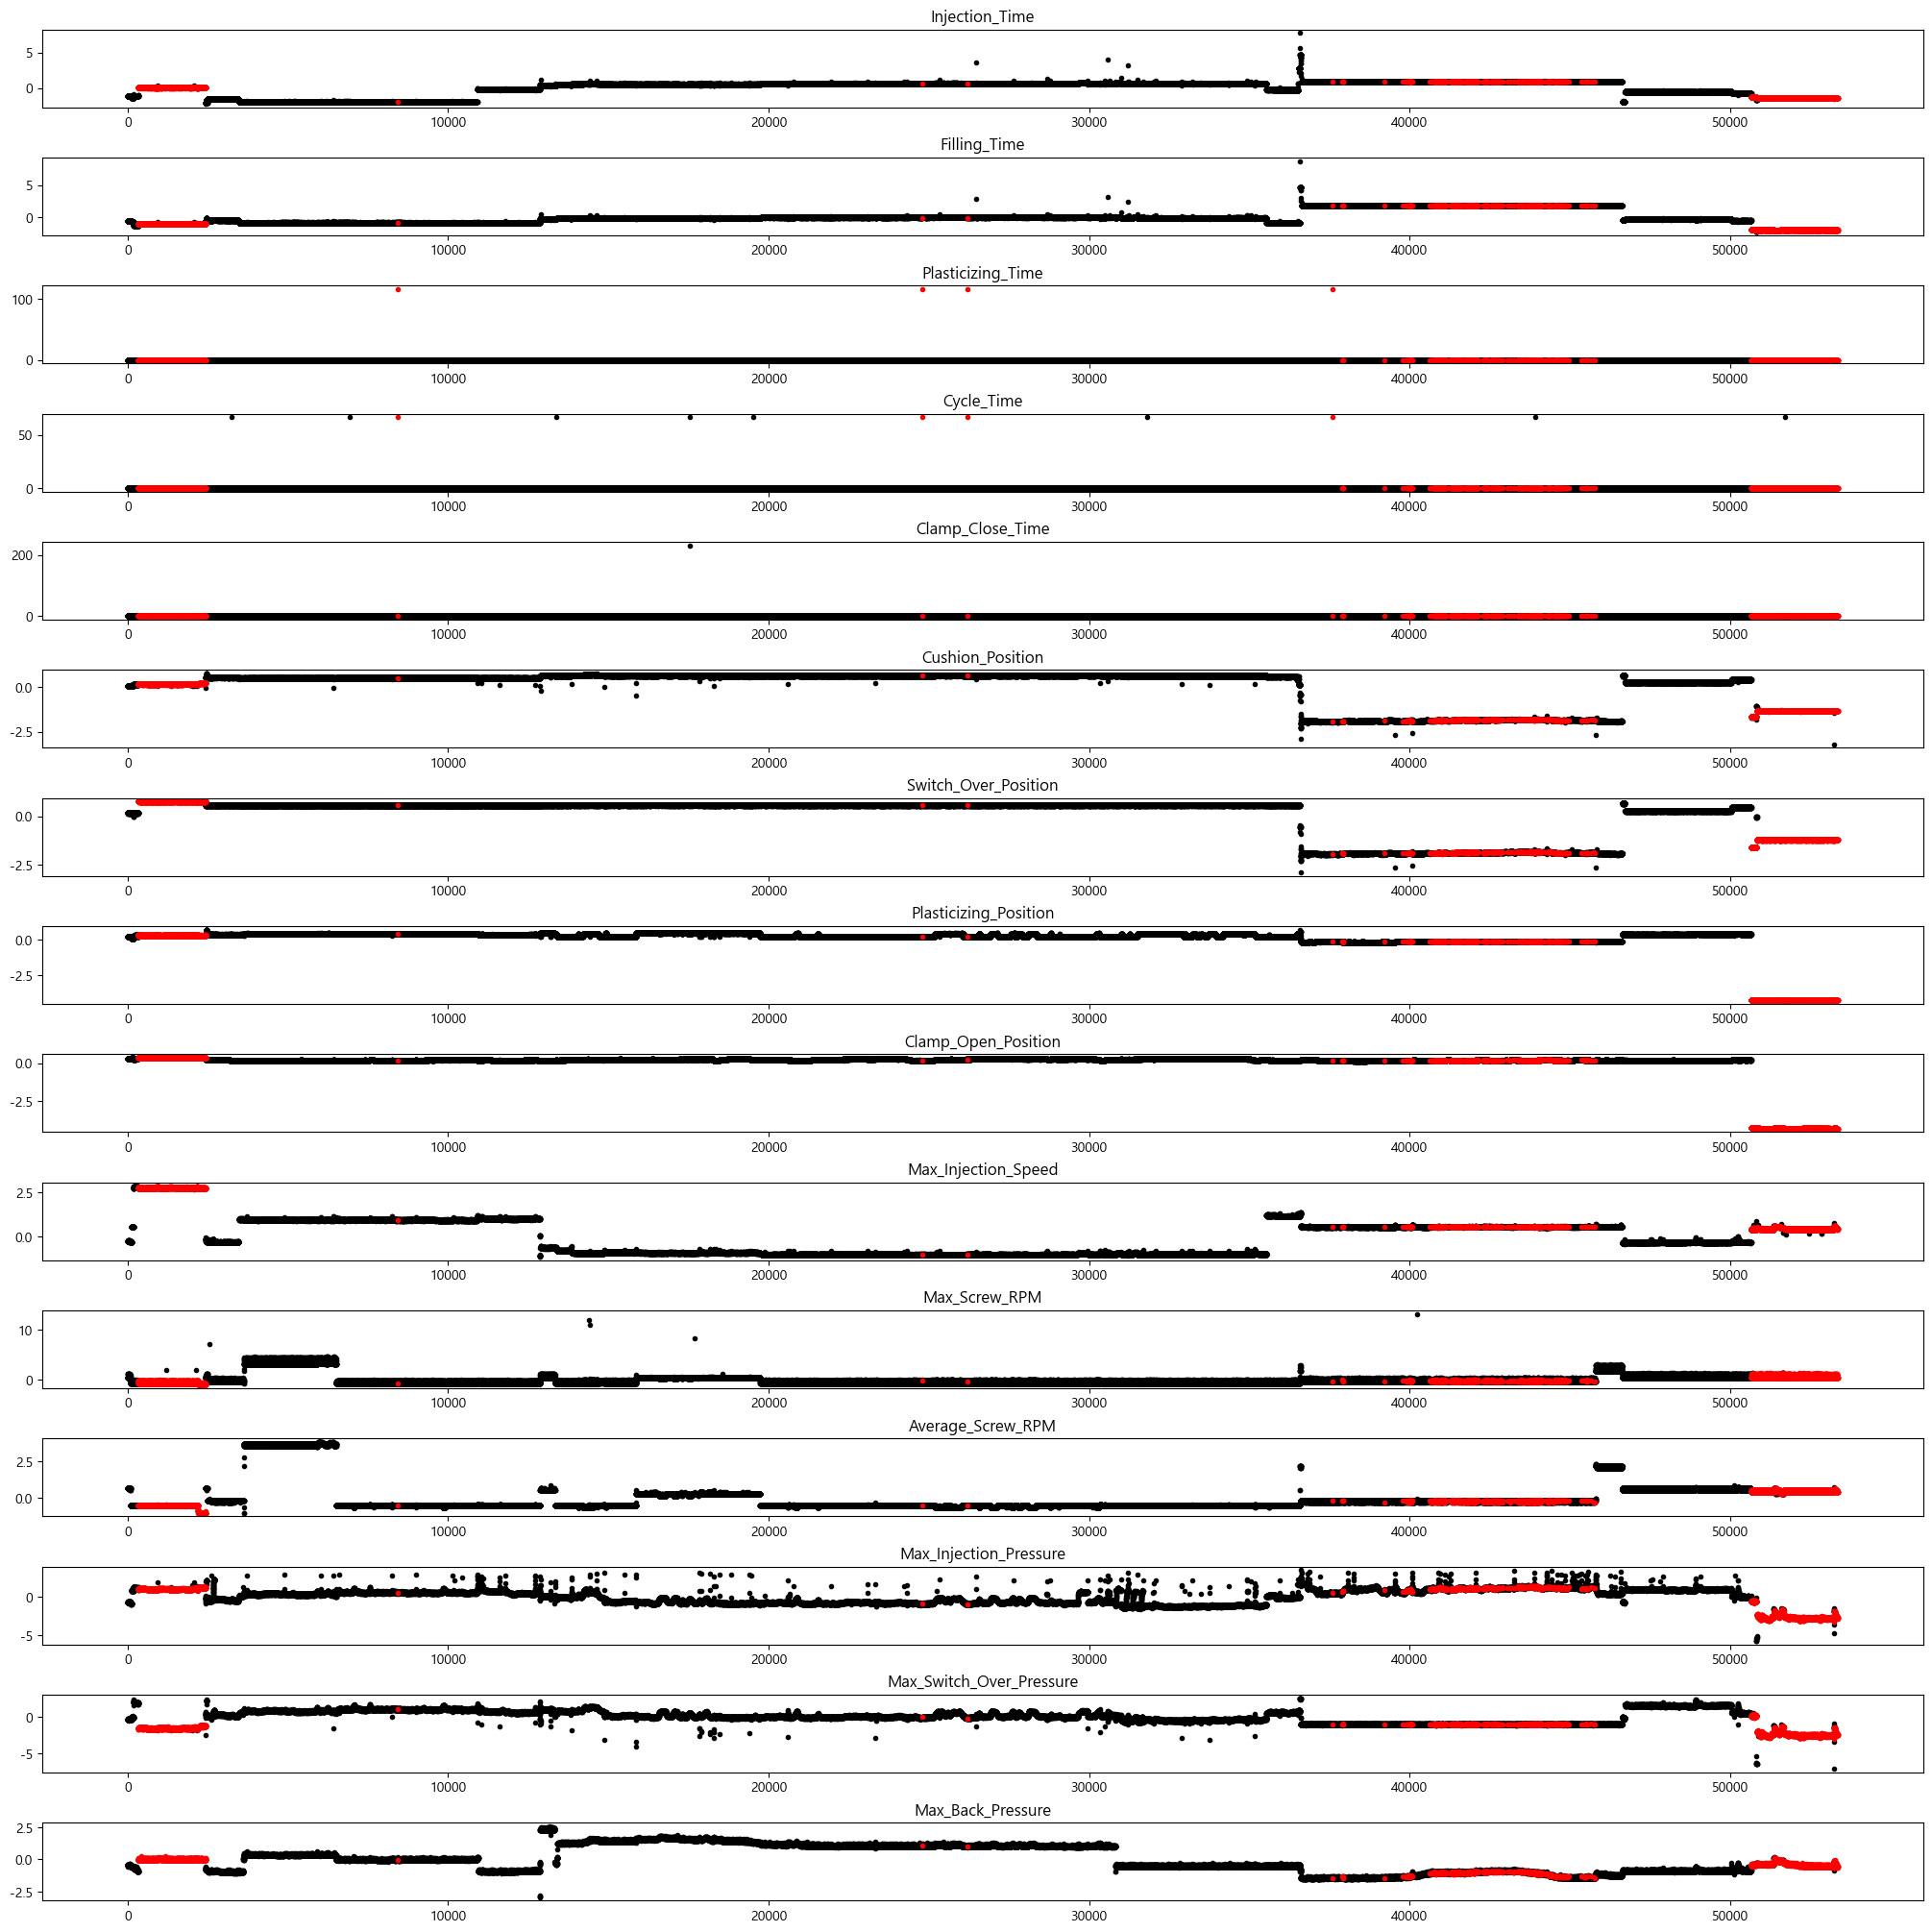

In [18]:
fig, axs = plt.subplots(15, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_index, i], '.k')
    axs[i].plot(scaled_df.iloc[anomalies.index, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

# isolation forest mad

In [19]:
from sklearn.ensemble import IsolationForest

# 모델 생성 및 학습
clf = IsolationForest(contamination=0.05)  # contamination은 이상치 비율을 나타냅니다.
clf.fit(scaled_df)




d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.05)

In [20]:
# 이상 데이터 예측
predictions = clf.predict(scaled_df)
predictions

array([ 1,  1,  1, ..., -1, -1, -1])

In [21]:
normal_idx = np.where(predictions==1)[0]
anommal_idx = np.where(predictions==-1)[0]


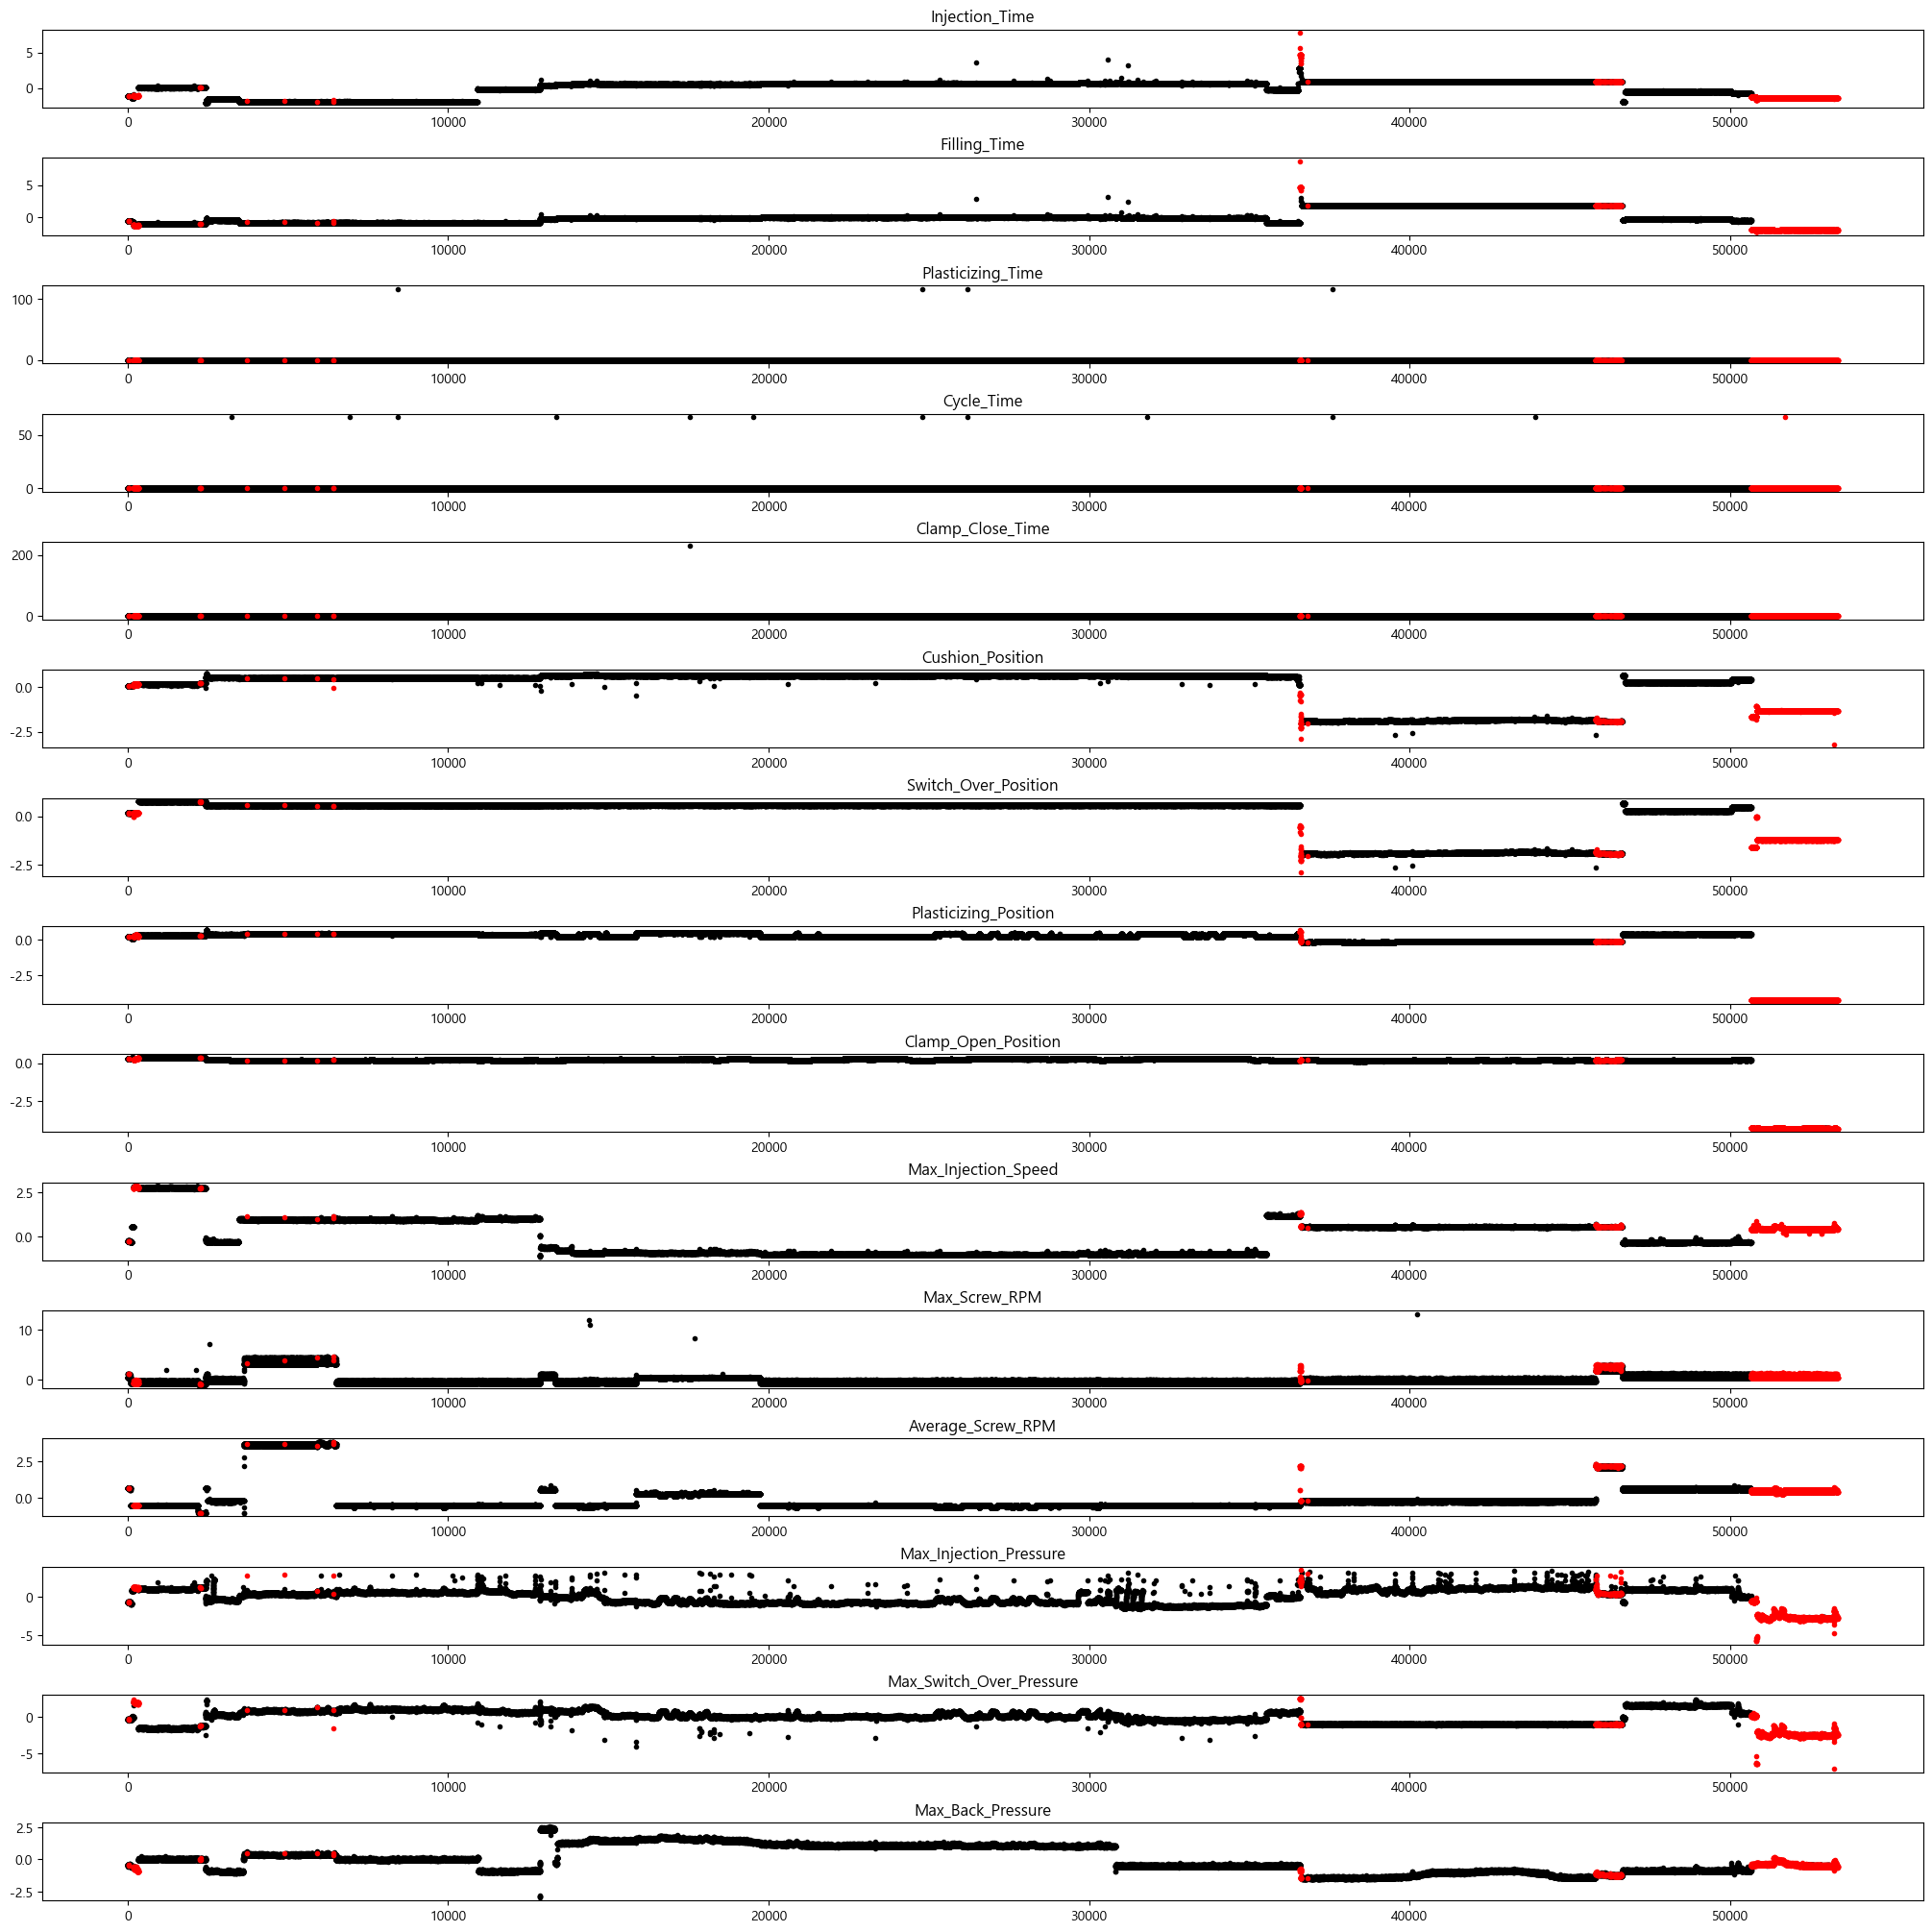

In [22]:
fig, axs = plt.subplots(15, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_idx, i], '.k')
    axs[i].plot(scaled_df.iloc[anommal_idx, i], '.r')
    axs[i].set_title(scaled_df.columns[i])

In [23]:

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Model



In [24]:

data = scaled_df.values  # 10차원 다중 변수 데이터 예제
# 데이터 전처리
sequence_length = 10  # 시퀀스 길이
X = []
for i in range(len(data) - sequence_length + 1):
    X.append(data[i:i+sequence_length])

X = np.array(X)

In [25]:
# 모델 구성
input_layer = Input(shape=(sequence_length, 15))
encoded = LSTM(5, activation='relu', return_sequences=True)(input_layer)
encoded = LSTM(10, activation='relu', return_sequences=False)(encoded)
decoded = RepeatVector(sequence_length)(encoded)
decoded = LSTM(10, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(15))(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mse')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 15)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 5)             420       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                640       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 10)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 10)            840       
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 15)            165       
Total params: 2,065
Trainable params: 2,065
Non-trainable params: 0
___________________________________________________________

In [27]:
# 모델 학습
autoencoder.fit(X, X, epochs=15, batch_size=32, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 53344 samples
Epoch 1/15
53344/53344 [==============================] - 29s 539us/sample - loss: 0.3323
Epoch 2/15
53344/53344 [==============================] - 30s 557us/sample - loss: 0.2310
Epoch 3/15
53344/53344 [==============================] - 29s 551us/sample - loss: 0.2195
Epoch 4/15
53344/53344 [==============================] - 27s 505us/sample - loss: 0.2167
Epoch 5/15
53344/53344 [==============================] - 26s 495us/sample - loss: 0.2146
Epoch 6/15
53344/53344 [==============================] - 39s 737us/sample - loss: 0.2134
Epoch 7/15
53344/53344 [==============================] - 37s 692us/sample - loss: 0.2127
Epoch 8/15
53344/53344 [==============================] - 34s 639us/sample - loss: 0.2120
Epoch 9/15
53344/53344 [==============================] - 33s 615us/sample - loss: 0.2116
Epoch 10/15
53344/53344 [==============================] - 40s 748us/samp

In [29]:
predictions = autoencoder.predict(X)

In [33]:

# 재구성 손실 계산
reconstruction_loss = np.mean(np.square(X - predictions))

# 재구성 손실을 기반으로 이상 감지 여부 판단
threshold = 0.1  # 임계값 조정
if reconstruction_loss > threshold:
    print("이상 감지: Reconstruction Loss =", reconstruction_loss)
else:
    print("정상 데이터: Reconstruction Loss =", reconstruction_loss)

이상 감지: Reconstruction Loss = 0.20746539954953652


In [39]:
anomal_index = []
normal_idx = []


for i in range(predictions.shape[0]):
    # 재구성 손실 계산
    reconstruction_loss = np.mean(np.square(X[i] - predictions[i]))

    # 재구성 손실을 기반으로 이상 감지 여부 판단
    threshold = 0.15  # 임계값 조정
    if reconstruction_loss > threshold:
        anomal_index.append(i)
    else:
        normal_idx.append(i)

In [46]:
X[anomal_index].shape

(442, 10, 15)

In [50]:
normal_index = scaled_df.index.difference(anomal_index)
normal_index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            53343, 53344, 53345, 53346, 53347, 53348, 53349, 53350, 53351,
            53352],
           dtype='int64', length=52911)

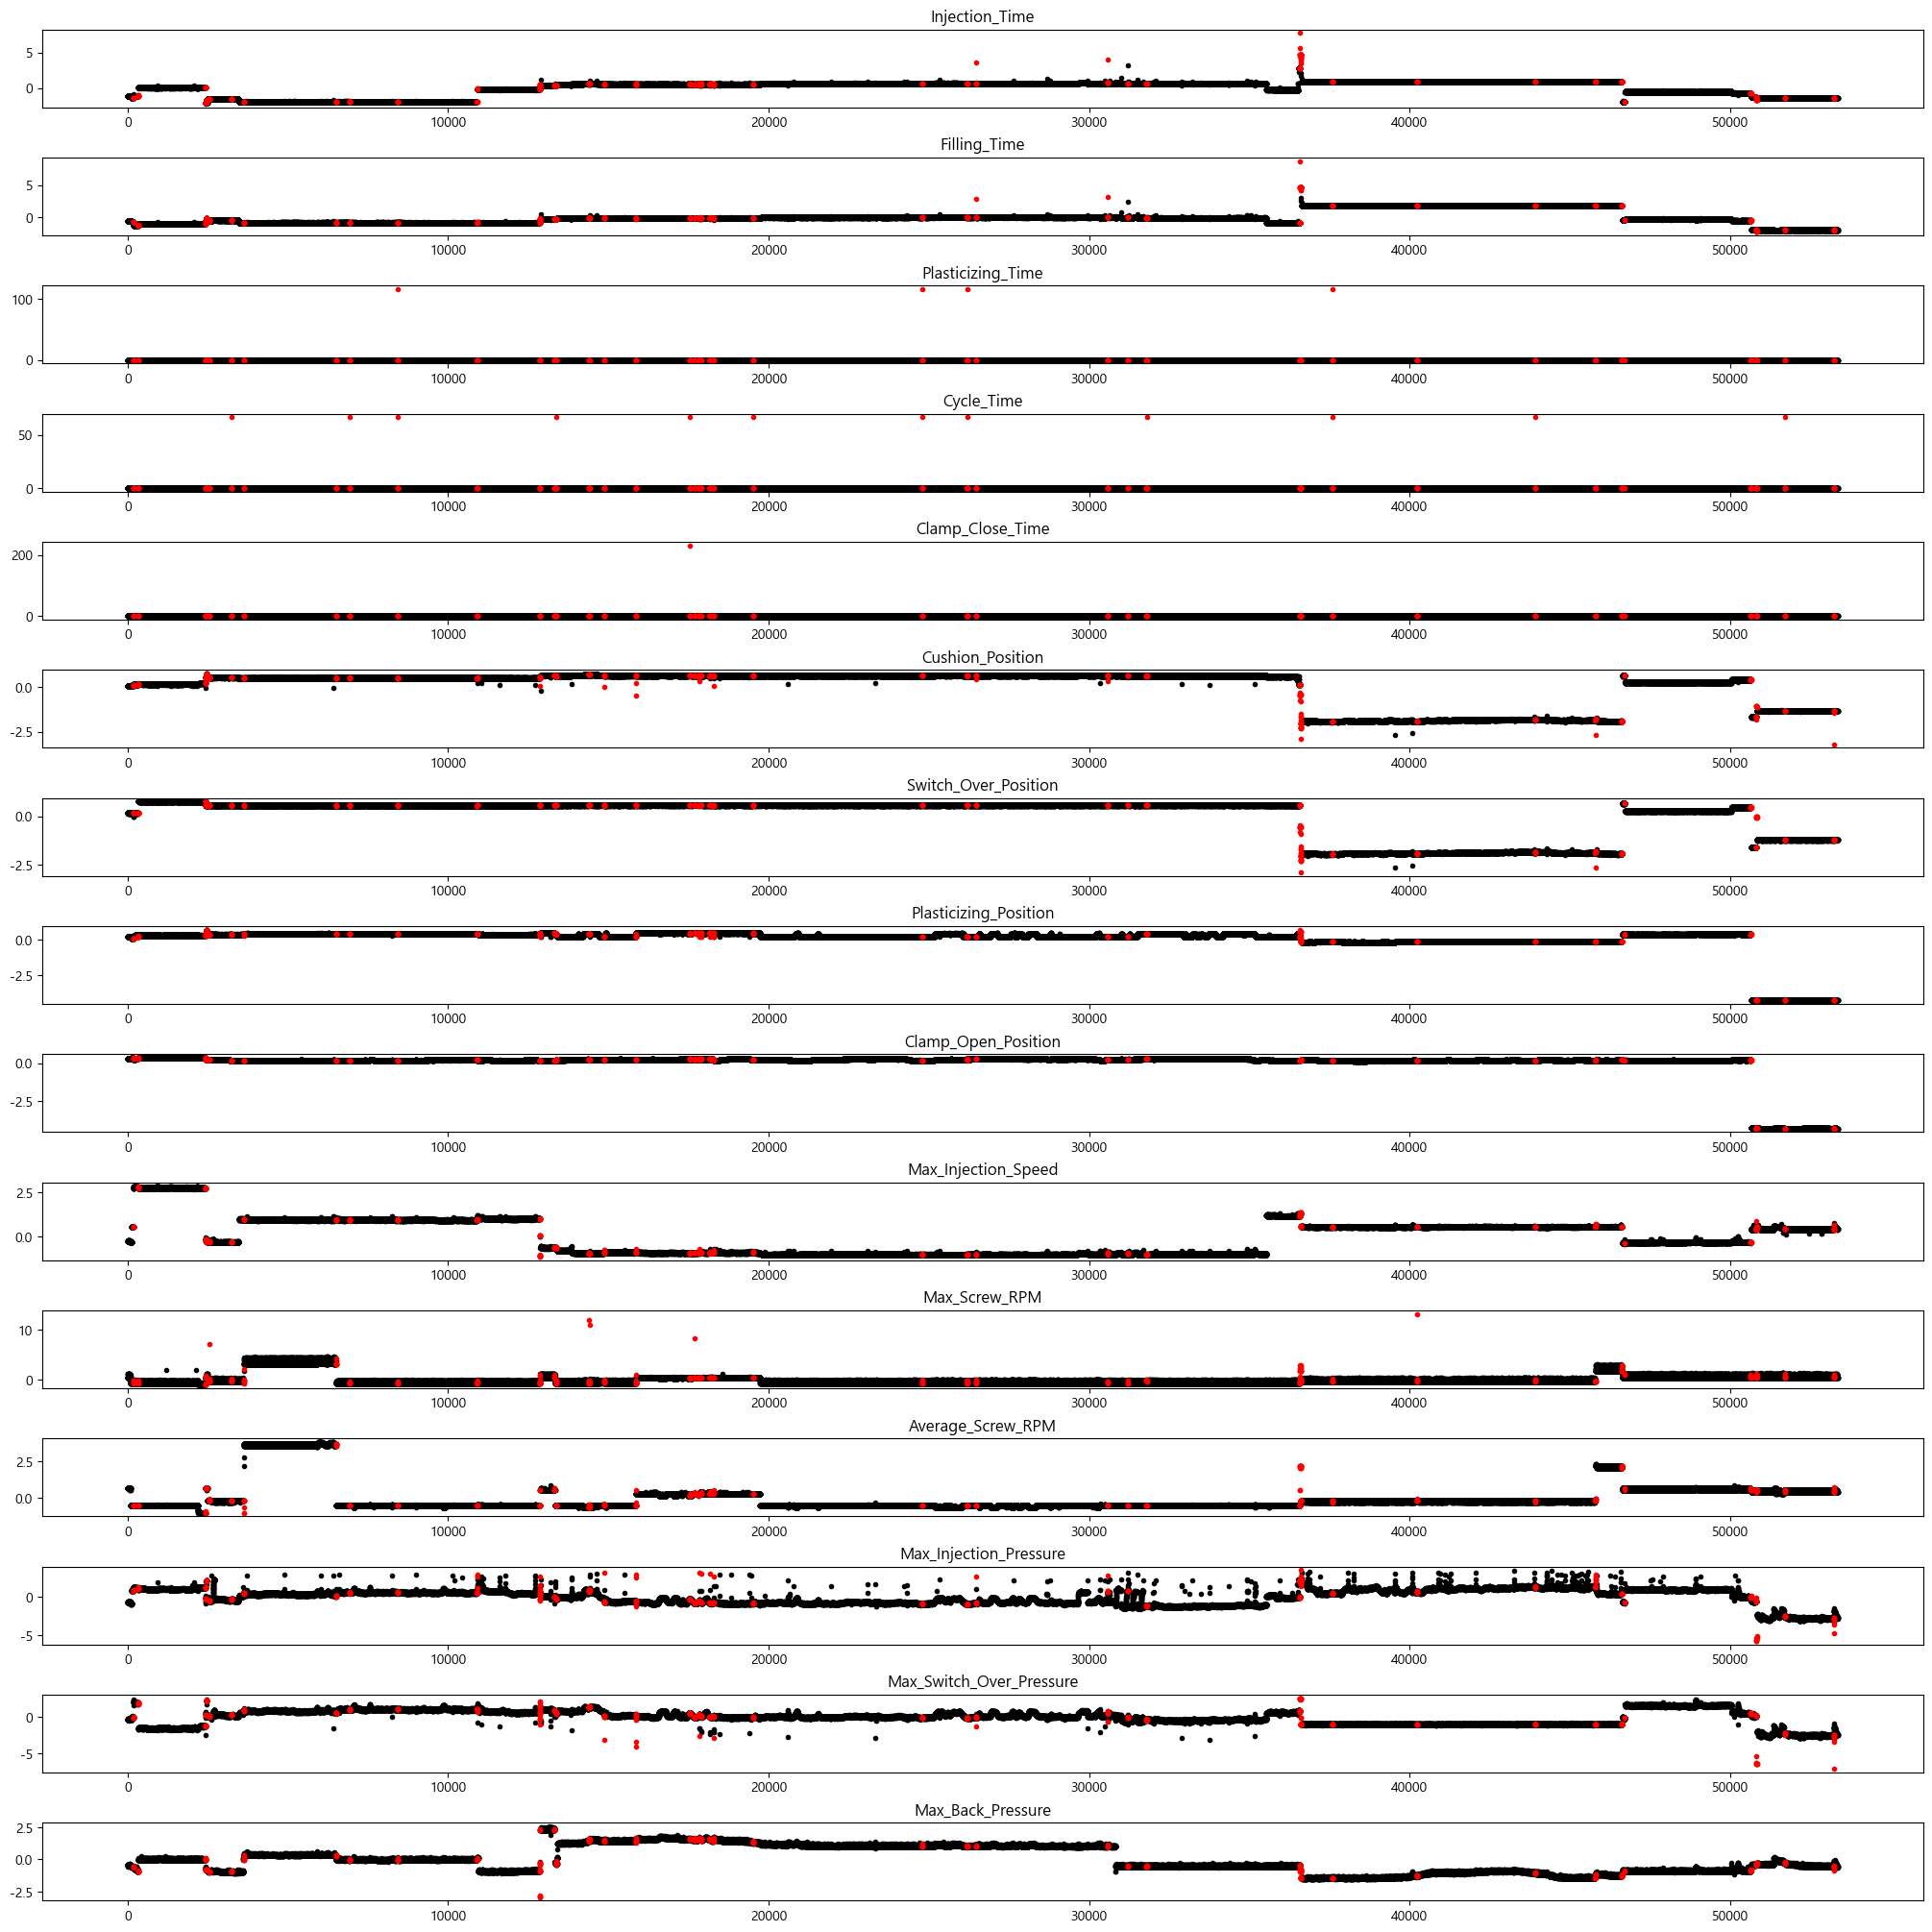

In [51]:
fig, axs = plt.subplots(15, 1, figsize=(20,20),constrained_layout=True)

for i, a in enumerate(axs):
    axs[i].plot(scaled_df.iloc[normal_index, i], '.k')
    axs[i].plot(scaled_df.iloc[anomal_index, i], '.r')
    axs[i].set_title(scaled_df.columns[i])